# Dimerization in a 1D lattice

Construct the model (in a .py file) representing a one-dimensional Hubbard model with dimerization. The hopping terms are between nearest neighbors only, but they alternate between the value $t$ and the value $t'$.
Plot the spectral function for the case $t=1.1$ and $t'=0.9$, at $U=0$ and then $U=4$, at half-filling.
Compare the $U=0$ case with the analytic solution to the problem.

In [1]:
from pyqcm import *
from pyqcm.spectral import *
from pyqcm.draw_operator import * # To be able to look at the actions of the operators
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 125 # Making matplotlib elements slightly bigger

Number of openMP threads = 4


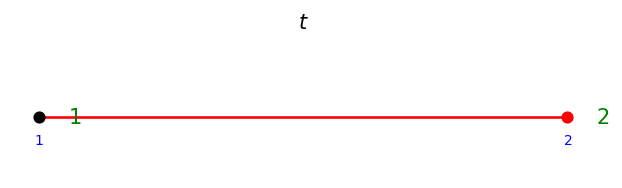

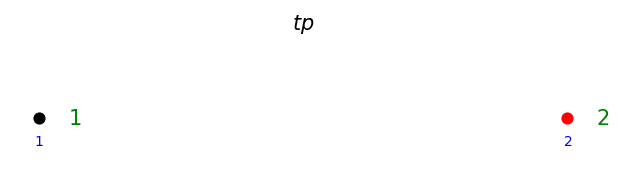

In [2]:
# Defining a simple 1D chain arranged in clusters of two sites
new_cluster_model('clus', 2, 0)  # Creating a new cluster with two sites
add_cluster('clus', [0,0,0], [[0,0,0], [1,0,0]]) # Specifying the geometry of the cluster (two sites in a horizontal row)
lattice_model('1D_4', [[2,0,0]], [[2,0,0]]) # Defining the appropriate super-lattice
set_basis([[0.5,0,0]]) # This allows for the proper Brillouin zone in the plots

# Creating a LOCAL interaction operator for each band
interaction_operator('U', band1=1, band2=1)
interaction_operator('U', band1=2, band2=2)

hopping_operator('t', [1,0,0], -1, band1=1, band2=2) # Hopping between sites of the dimer
hopping_operator('tp', [1,0,0], -1, band1=2, band2=1) # Hopping between dimers (AKA clusters)

draw_operator("t") # intra-cluster hopping
draw_operator("tp") # inter-cluster hopping, notice how there is no displayed link!

In [3]:
# Defining the sector of Hilbert space taken into account. 
set_target_sectors(['R0:N2:S0']) # 2 particles, total spin 0

# Simulation parameters
set_parameters("""
t=1.1
tp=0.9
U=1e-9
mu=0.5*U
""")


[('t', 1.1), ('tp', 0.9), ('U', 1e-09), ('mu', 0.5, 'U')]

### Non-interacting case $(U\simeq0)$

Ground state: [(-2.2000000005, 'R0:N2:S0:1')]
{'U': (0.24999999994318167, 0.0625), 'mu': (0.9999999999999992, 6.661338147750939e-16), 't': (-0.9999999999999991, 8.881784197001252e-16)}


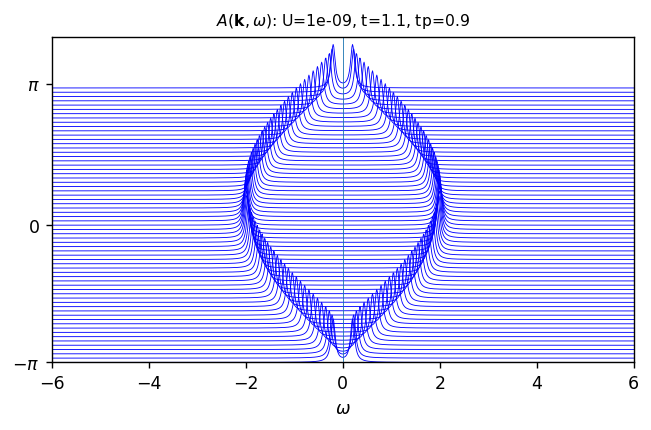

In [4]:
# Instantiating model
set_parameter("U", 1e-9) # To make sure correct U is used no matter execution order of cells
new_model_instance()

# Looking at cluster stats
print(f"Ground state: {ground_state()}")
print(cluster_averages())

# Plotting the spectral function
spectral_function(path="line") # path=line --> 1D stuff 

### Interacting case $(U=4)$

Ground state: [(-4.973213749463699, 'R0:N2:S0:1')]
{'U': (0.08183180150092192, 0.03421945701357468), 'mu': (0.9999999999999993, 4.440892098500626e-16), 't': (-0.7399400733959435, 0.45248868778280515)}


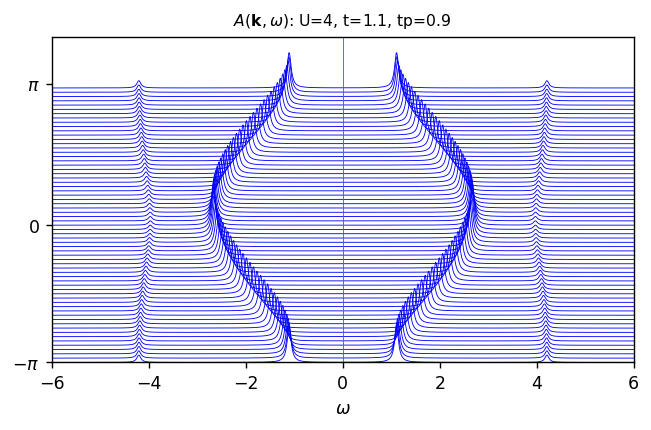

In [5]:
# Setting U=4
set_parameter('U', 4)

# Creating a new instance with the updated parameter 
new_model_instance()

# The same output as before
print(f"Ground state: {ground_state()}")
print(cluster_averages())
spectral_function(path="line")

**From the above spectral functions, we can gather that:**
 - U=0: Small gap around $\omega = 0$: the dimerization gap. The system is a band insulator at half-filling.
 - U=4: Considerably larger gap. The system is a Mott insulator, on top of a band insulator.

**Let us compare with the analytical solution in the non-interacting case:**

Remember that:

$$t_{\alpha,\beta}(k) = \sum_{\delta}\operatorname{e}^{-ik\cdot\delta}t_{\alpha, \beta}(n,n+\delta)$$

Electrons can only jump between bands and therefore the diagonal is $t_{\alpha, \alpha}(k) = 0$. By requiring that $t_{\alpha, \beta}(k)$ be hermitian, we only need to calculate explicitely $t_{1,2}(k)$:

$$t_{1,2}(k) = t\operatorname{e}^{-ik} + t'\operatorname{e}^{ik} ~\Rightarrow~ t_{2,1}(k) = t\operatorname{e}^{ik} + t'\operatorname{e}^{-ik}$$

In matrix form:

$$t(k) = \begin{bmatrix}
    0 & t\operatorname{e}^{-ik} + t'\operatorname{e}^{ik} \\
    t\operatorname{e}^{ik} + t'\operatorname{e}^{-ik} & 0
\end{bmatrix}$$

This matrix admits two distinct eigenvalues:
$$
    \varepsilon_{\pm}(k) = \pm\sqrt{t^2 + 2tt'\operatorname{cos}(2k) + (t')^2}
$$
This is the dispersion function that can be plotted using Matplotlib (see below).

A different view would be to treat the two band as occupying the same site, this time with an inter-site distance of 2. In that case the hopping matrix is

$$t(k) = \begin{bmatrix}
    0 & t + t'\operatorname{e}^{2ik} \\
    t + t'\operatorname{e}^{-2ik} & 0
\end{bmatrix}$$

which leads to the same eigenvalues. The two versions of the hopping matrix only differ by a diagonal unitary transformation.

/tmp/ipykernel_19996/2561797333.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


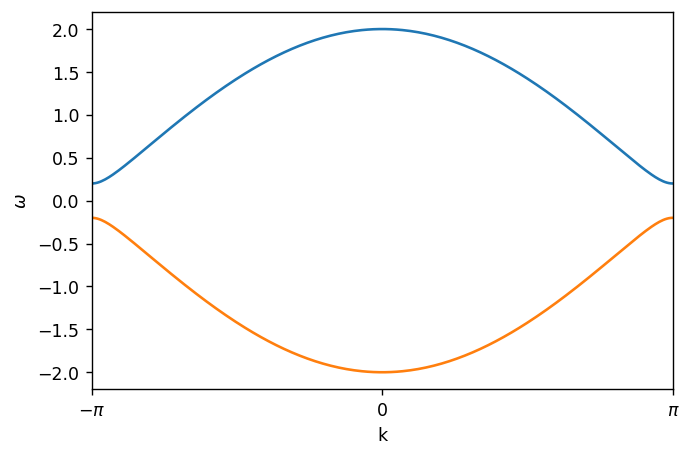

In [6]:
# Defining the energy eigenvalue function
def dispersion(k, t, t_prime):
    return np.sqrt( t*t + 2*t*t_prime*np.cos(2*k) + t_prime*t_prime )

# Divide by 2 to have the correct Brillouin zone
k_grid = np.linspace(-np.pi/2, np.pi/2, 300)

fig, ax = plt.subplots()

ax.plot(k_grid, dispersion(k_grid, 1.1, 0.9))
ax.plot(k_grid, -dispersion(k_grid, 1.1, 0.9))

ax.set_xlabel("k")
ax.set_ylabel("$\omega$")

ax.set_xticks([-np.pi/2, 0, +np.pi/2])
ax.set_xticklabels(["$-\pi$", "0", "$\pi$"])

ax.set_xlim((-np.pi/2, np.pi/2))

fig.show()

The solution is identical, as expected.